In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt

In [3]:
# Reading data into pandas dataframe
path = r"C:\Users\llubowa\Downloads\fitness_class_2212.csv"
df = pd.read_csv(path)

Data preprocessing

booking_id: Nominal. No missing values and every value is unique of integer datatype.

months_as_member: No missing values. The minimum value is 1. Datatype is integer

Weight: Has 20 missing values. They have been replaced with the average(82.61) rounded to 2 decimal places.Minimum value is 55.41 kg and the datatype is float

Days_before: No missing values. The string " days" has been dropped off the values it was attached and the datatype changed to integer. The minimum value is 1 for this column

day_of_week: No missing values. Values 'Wednesday','Monday'and 'Fri.' were replaced with 'Wed','Mon' and 'Fri' respectively to match the column description. Datatype changed to category.

Time: No missing values. Has two categories 'AM'and 'PM'. Datatype was changed to category

Category: 13 missing values represented as '-', these were replaced with 'unknown'. Datatype changed to category

attended: No missing values.Has two classes 1 and 0. Datatype changed to category

In [4]:

df['weight'].fillna(round(df['weight'].mean(),2),inplace=True)
df['days_before'] = df['days_before'].str.replace(" days","").astype(int)
df['day_of_week'].replace('Wednesday','Wed',inplace=True)
df['day_of_week'].replace('Monday','Mon',inplace=True)
df['day_of_week'].replace('Fri.','Fri',inplace=True)
df['day_of_week']=df['day_of_week'].astype('category')
df['time'] = df['time'].astype('category')
df['category'] = df['category'].str.replace('-','unknown')
df['category']=df['category'].astype('category')
df['attended']=df['attended'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int32   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(4), float64(1), int32(1), int64(2)
memory usage: 47.8 KB


booking_id: Nominal. No missing values and every value is unique of integer datatype.
months_as_member: No missing values. The minimum value is 1. Datatype is integer
Weight: Has 20 missing values. They have been replaced with the average(82.61) rounded to 2 decimal places.Minimum value is 55.41 kg and the datatype is float
Days_before: No missing values. The string " days" has been dropped off the values it was attached and the datatype changed to integer. The minimum value is 1 for this column
day_of_week: No missing values. Values 'Wednesday','Monday'and 'Fri.' were replaced with 'Wed','Mon' and 'Fri' respectively to match the column description. Datatype changed to category.
Time: No missing values. Has two categories 'AM'and 'PM'. Datatype was changed to category
Category: 13 missing values represented as '-', these were replaced with 'unknown'. Datatype changed to category
attended: No missing values.Has two classes 1 and 0. Datatype changed to category

Data Analysis

From Figure 1, the observations are imbalanced accross the categories of attended. The number of observations in category(0) are more than twice that of category(1).

C:\Users\llubowa\AppData\Local\Temp\ipykernel_10608\3027045030.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


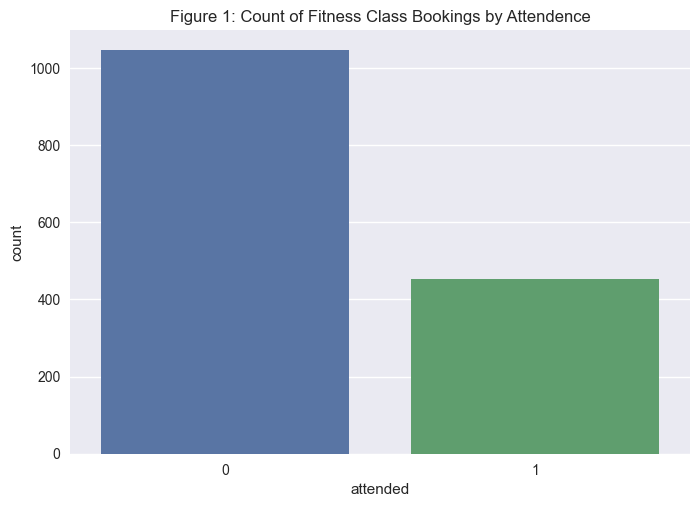

In [5]:
style.use('seaborn')
sns.countplot(data=df,x='attended')
plt.title('Figure 1: Count of Fitness Class Bookings by Attendence');

From figure 2, the distribution of the number of months as a member to fittness class is skewed to the right. Most members have been fittness club members for less than 40 months with very few who have been members for over 100 months.

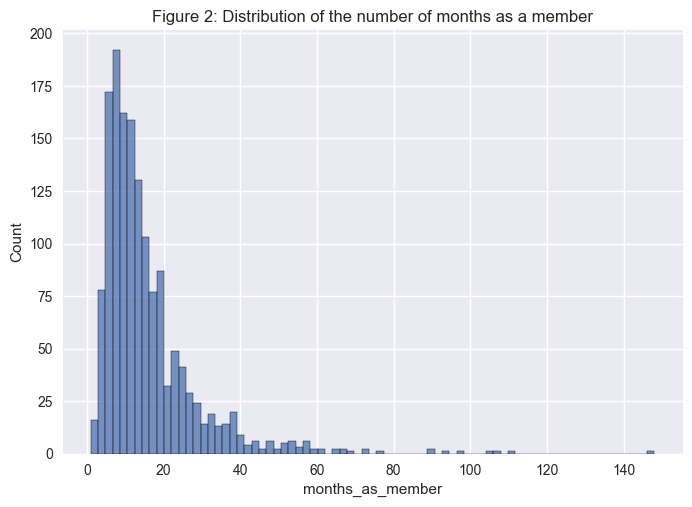

In [6]:
sns.histplot(data=df,x='months_as_member')
plt.title('Figure 2: Distribution of the number of months as a member');

From the graphs below, the average number of months as a member for members who did not attend the class (0) is lower that that for those who attended the class (1).

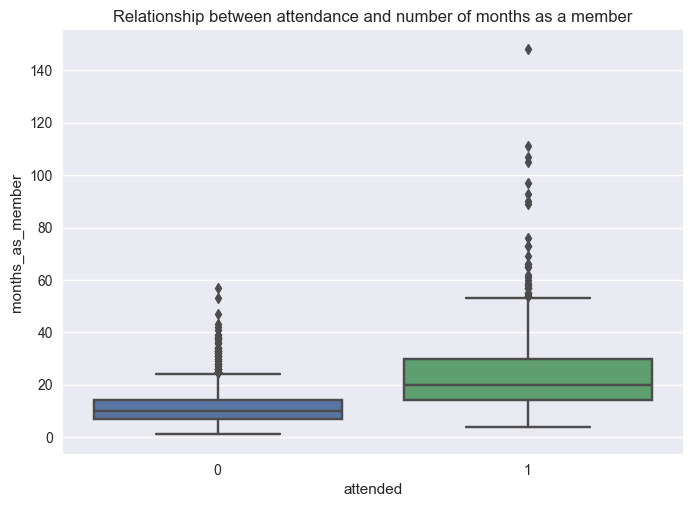

In [7]:
sns.boxplot(data=df,x='attended',y='months_as_member')
plt.title('Relationship between attendance and number of months as a member');

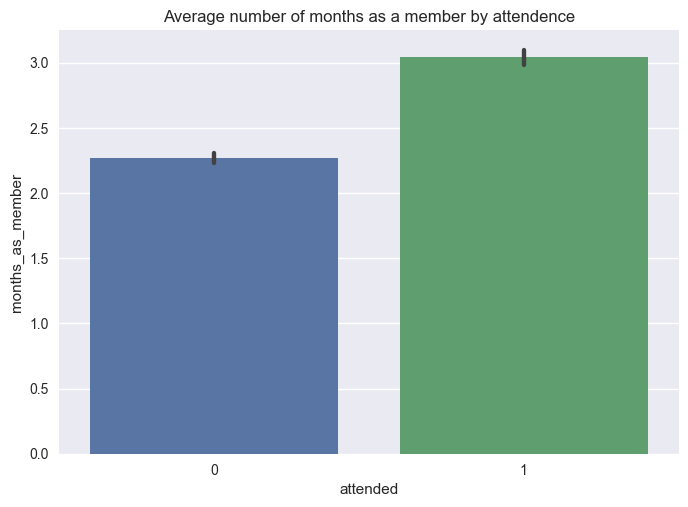

In [22]:
sns.barplot(data=df, x='attended',y='months_as_member')
plt.title('Average number of months as a member by attendence');

Machine Learning.

This is a classification problem

In [8]:
# Importing the necessary libraries to use
from sklearn.model_selection import train_test_split
import numpy as np
#Applying logtransform to months as member to reduce data skewness
df['months_as_member'] = np.log(df['months_as_member'])
#Separaring data target and feature variables
features = df.columns.drop(['attended','booking_id'])
target = 'attended'
# Converting categorical features to numerical
X = pd.get_dummies(df[features], columns=['day_of_week','time','category'])
y = df[target]
#Splitting data into training and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

I chose decision tree classifier as the base line model because this is a classification problem. Decision tree classifier is simple to understand and interprete. It can capture non linear relationships between features and the target variable.

I chose random forest classifier model for comparison because it is an ensemble model that can capture complex relationships and interactions between features. Being an ensemble model, it combines multiple decision trees reducing overfitting hence resulting in better accuracy compared to a single Decision Tree classifier.

Baseline Model: Decision Tree Classifier

In [9]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Instantiating the model
baseline_model = DecisionTreeClassifier(random_state=42)
# Fitting the model to the training data
baseline_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Comparison Model: Random Forest Classifier

In [11]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiating the model
comp_model = RandomForestClassifier(random_state=42)
# Fitting the model to the training data
comp_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Importing the accuracy score library
from sklearn.metrics import accuracy_score
# Using the baseline model to make predictions on the test dataset
score_baseline = accuracy_score(baseline_model.predict(X_test),y_test)
print(f'Baseline model score:',score_baseline)
# Using the comparison model to make predictions on the test dataset
score_comparison = accuracy_score(comp_model.predict(X_test),y_test)
print(f'Comparison model score:',score_comparison)

Baseline model score: 0.69
Comparison model score: 0.7566666666666667


The comparison model performs better.

Random forest classifier has a higher accuracy score compared to the decision tree classifier. Accuracy score measures the overall correctness of the predictions made by the model. It calculates the ratio of correct predictions to the total number of predictions. Therefore a model with the highest score has a better perfoemance.